In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## Preprocessing

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
class_names = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [17]:
(x_t, y_t), (x_f, y_f) = cifar10.load_data()

In [19]:
x_t = x_t / 255.0
x_f = x_f / 255.0

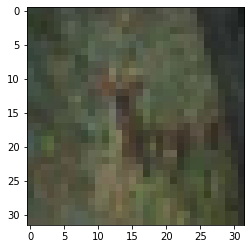

In [20]:
plt.imshow(x_t[10])

## Build Model

In [29]:
model = tf.keras.models.Sequential() #sequential graphs

- filters: 32
- kernel: 3 (3x3 convolutions)
- padding: same (size of output same as input. Adds padding on beg and end of pixels)
- activation: relu
- input_shape: (32, 32, 3)

In [30]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Second layer

In [31]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

- pool_size: 2
- strides: 2
- padding: valid (exclude pixels that don't fit input size specs) (it's ok to loose info in max pooling)

In [32]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"))

### Third Layer

In [33]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

### Forth Layer

In [35]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [38]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"))

### Flattening layer
flatten results into a single layer

In [39]:
model.add(tf.keras.layers.Flatten())

### Fully Connected Layer

In [40]:
model.add(tf.keras.layers.Dense(units=128, activation="relu"))

### Output Layer

In [41]:
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)             

## Compile Model

In [43]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

## Train Model

In [44]:
model.fit(x_t, y_t, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 103s 2ms/sample - loss: 1.3657 - sparse_categorical_accuracy: 0.5078
Epoch 2/5
50000/50000 [==============================] - 105s 2ms/sample - loss: 0.9161 - sparse_categorical_accuracy: 0.6797
Epoch 3/5
50000/50000 [==============================] - 99s 2ms/sample - loss: 0.7418 - sparse_categorical_accuracy: 0.7409
Epoch 4/5
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.6232 - sparse_categorical_accuracy: 0.7830
Epoch 5/5
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.5181 - sparse_categorical_accuracy: 0.8169


In [45]:
test_loss, test_acc = model.evaluate(x_f, y_f)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [46]:
print(test_acc)

0.739
